In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def gauss_func(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2) 

In [15]:
def integral(func, mu, sigma, start_point, end_point, n_samples):
    step = (end_point - start_point) / n_samples
    result = [0]
    for i in range(1, n_samples):
        result.append(result[i - 1] + func(start_point + step / 2, mu, sigma) * step)
        start_point += step
    return result 

## Let's try to get high accuracy

In [75]:
START_POINT = -2**10
END_POINT = 2**10
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 0.01)

In [76]:
mu_sig = [[0,1], [0, 5], [5, 2]]
COLORS = ['red', 'blue', 'green']

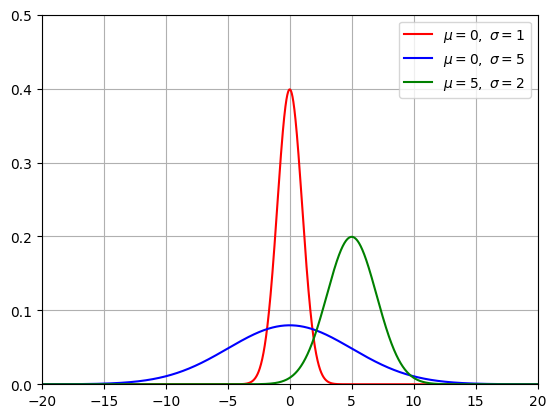

In [79]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

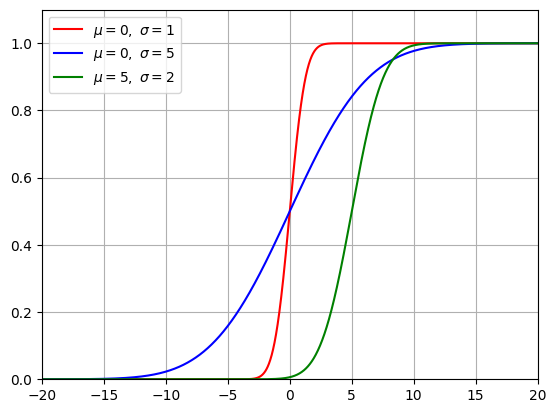

In [78]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [47]:
last_points

[1.0, 1.0000000000000109, 1.0000000000000184]

### Results
So as we know function probability must be equal to 1 in +infinity and we got really close results.


## Let's take lower bounds

In [62]:
START_POINT = -100
END_POINT = 100
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 0.01)

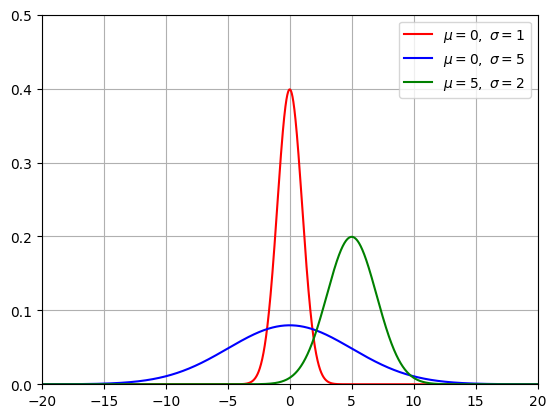

In [80]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

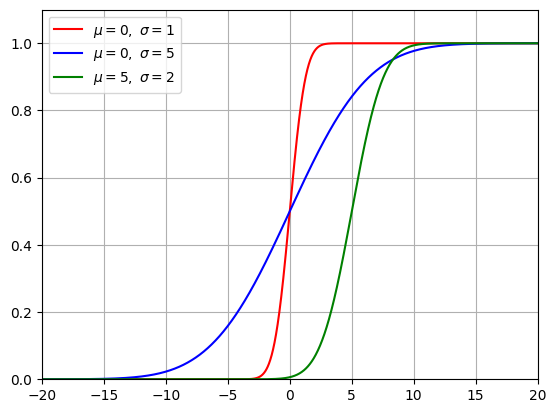

In [81]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [82]:
last_points

[1.0, 1.0000000000000109, 1.0000000000000184]

### Results
So as we can see according exactly to gaussian it doesn't demand huge bounds to get high accuracy in integral, due to exponential growth. 

## Let's take lower number of samples

In [86]:
START_POINT = -100
END_POINT = 100
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 1)

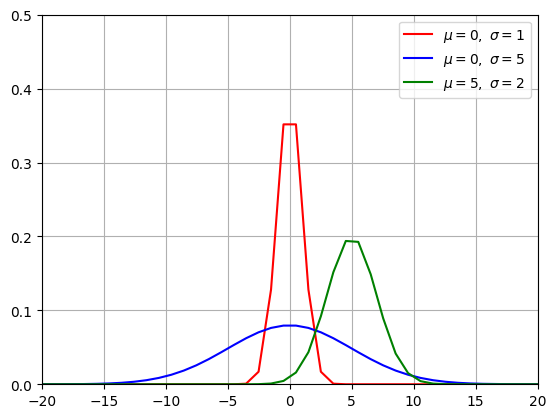

In [87]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

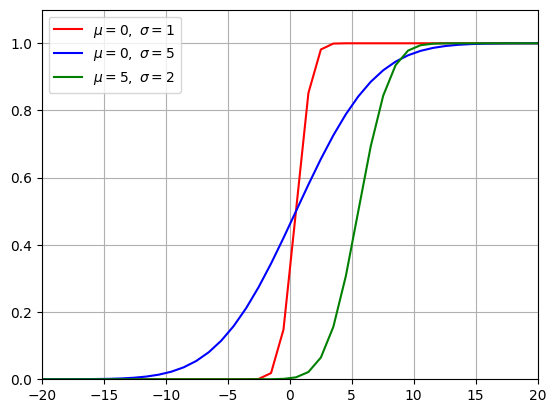

In [88]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [89]:
last_points

[0.9999999946494242, 1.0, 1.0]

### Results
Even with step=1 we get pretty high accuracy, again due to exponential growth of gaussian.